<a href="https://colab.research.google.com/github/Abhs1897/Machine-Learning/blob/main/Auto_Grad_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import torch.nn as nn

In [2]:
#Creates one dimensional tensor with start,stop and step like for loop in c++
a=torch.linspace(0,2*math.pi,steps=25,requires_grad=True)
a

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)

In [3]:
# detached_tensor=a.detach()
# detached_tensor
#Returns a new Tensor, detached from the current graph.
#The result will never require gradient.

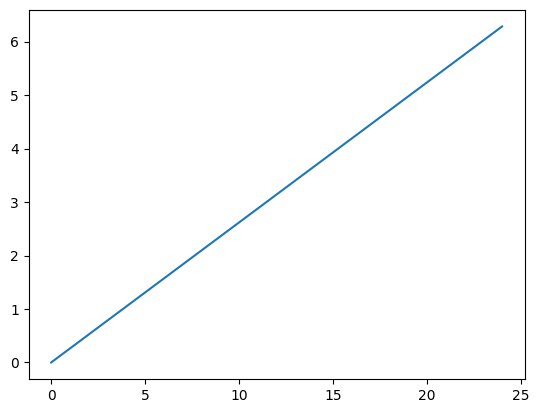

In [4]:
plt.plot(a.detach())

In [5]:
b=torch.sin(a)
b

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)

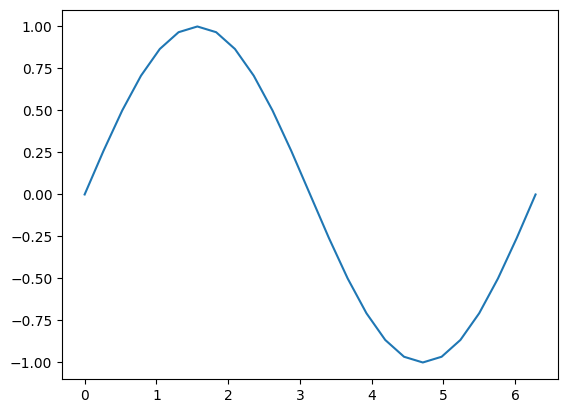

In [6]:
plt.plot(a.detach(),b.detach())

In [7]:
c=2*b
d=c+1
print(c)
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


In [8]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


In [9]:
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0])
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0])
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)

((<MulBackward0 object at 0x7a7d142bcb80>, 0), (None, 0))
((<SinBackward0 object at 0x7a7d142bcb80>, 0), (None, 0))
((<AccumulateGrad object at 0x7a7d142bf580>, 0),)


In [10]:
out.backward()
print(a.grad)

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


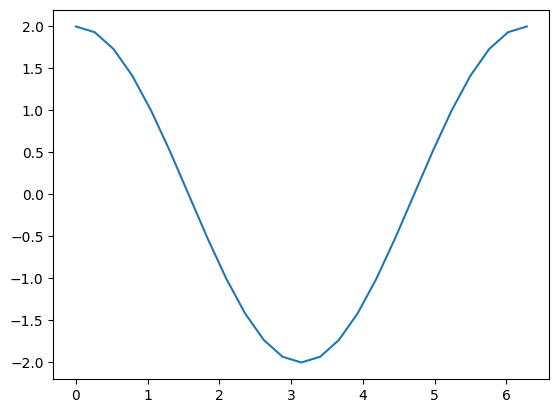

In [11]:
plt.plot(a.detach(), a.grad.detach())

In [12]:
BATCH_SIZE=16
DIM_IN=1000
HIDDEN_SIZE=100
DIM_OUT=100
class TinyModel(torch.nn.Module):
  def __init__(self):
    super(TinyModel,self).__init__()
    self.layer1=torch.nn.Linear(DIM_IN,HIDDEN_SIZE)
    self.relu=torch.nn.ReLU()
    self.layer2=torch.nn.Linear(HIDDEN_SIZE,DIM_OUT)
  def forward(self,x):
    x=self.layer1(x)
    x=self.relu(x)
    x=self.layer2(x)
    return x

In [13]:
some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)
model = TinyModel()

In [14]:
print(model.layer2.weight.shape)
print(model.layer1.weight.shape)
print(model.layer2.weight.grad)
print(model.parameters)

torch.Size([100, 100])
torch.Size([100, 1000])
None
<bound method Module.parameters of TinyModel(
  (layer1): Linear(in_features=1000, out_features=100, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=100, out_features=100, bias=True)
)>


In [15]:
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)
prediction=model(some_input)
loss=(ideal_output-prediction).pow(2).sum()
print(loss)

tensor(1679.0377, grad_fn=<SumBackward0>)


In [16]:
loss.backward()
#The optimizer is responsible for updating model weights based on the computed gradients.
optimizer.step()

print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

# One important thing about the process: After calling optimizer.step(),
# you need to call optimizer.zero_grad(), or else every time you run loss.backward(),
# the gradients on the learning weights will accumulate:



#optimizer.zero_grad(set_to_none=False)

tensor([-0.0076, -0.0827,  0.0272, -0.0565, -0.0090,  0.0546, -0.0524,  0.0024,
        -0.0339,  0.0419], grad_fn=<SliceBackward0>)
tensor([ 1.4671, -3.8155, -0.0496, -2.0459, -2.2716,  4.4180, -5.9930,  0.6723,
         2.0166, -2.4907])


In [17]:
#Setting requires grad to False
a=torch.ones(2,3,requires_grad=True)
print(a)
b1=2*a
print(b1)
a.requires_grad=False
b2=2*a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [18]:
#If you only need autograd turned off temporarily, a better way is to use the torch.no_grad():
a=torch.ones(2,3,requires_grad=True)*2
b=torch.ones(2,3,requires_grad=True)*3

c1=a+b
print(c1)


with torch.no_grad():
  c2=a+b

print(c2)

c3=a+b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)


In [19]:

#No grad can also be used in functions as a decorator
def add_tensor1(a,b):
  return a+b

@torch.no_grad()
def add_tensor2(a,b):
  return a+b


a=torch.ones(2,3,requires_grad=True)
b=torch.ones(2,3,requires_grad=True)

print(add_tensor1(a,b))
print(add_tensor2(a,b))

tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<AddBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [20]:
#Tensor object’s detach() method - it creates a copy of the tensor that is detached from the computation history

a=torch.ones(2,3,requires_grad=True)
b=a.detach()
print(a)
print(b)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [21]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True

x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y

print(prf.key_averages().table(sort_by='self_cpu_time_total'))

-------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::mul        51.04%       4.247ms        51.04%       4.247ms       4.247us          1000  
    aten::div        48.96%       4.074ms        48.96%       4.074ms       4.074us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 8.321ms



In [22]:
inputs = (torch.rand(1), torch.rand(1))
print(inputs)

(tensor([0.8969]), tensor([0.3930]))


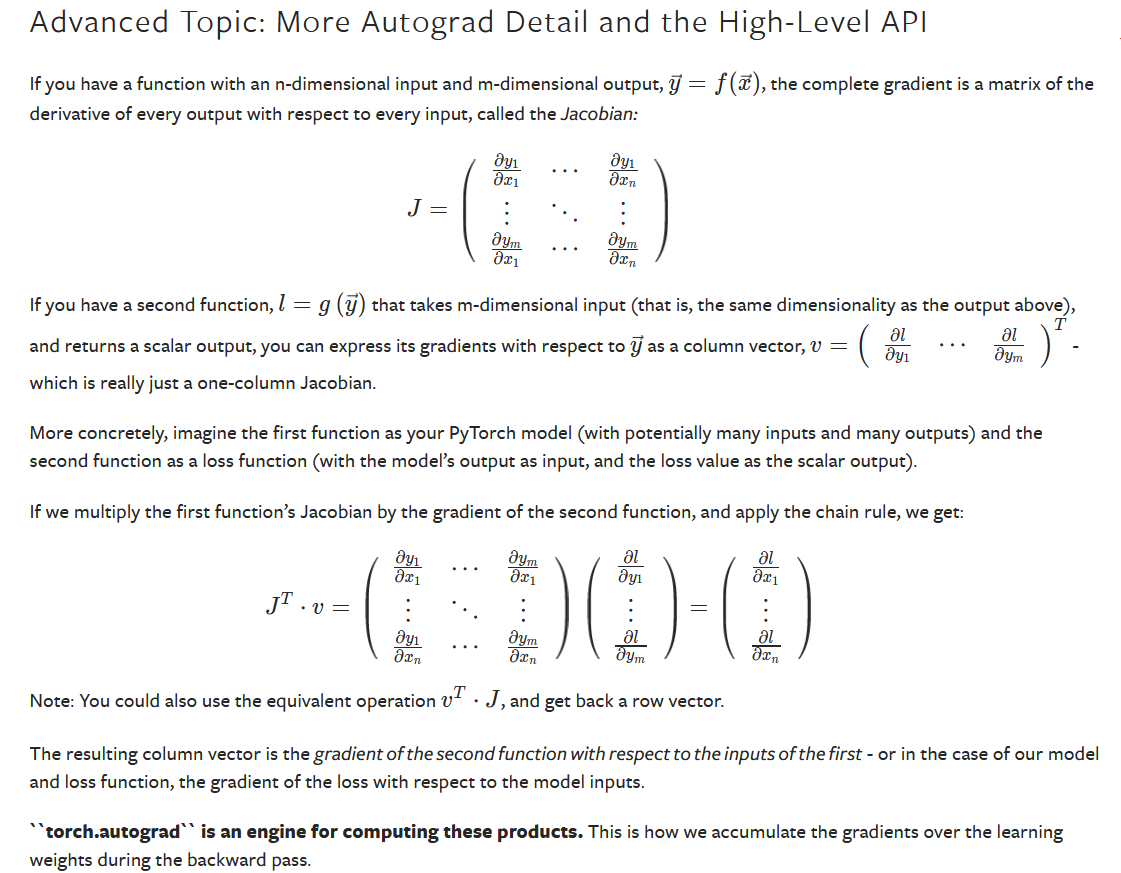

For this reason, the backward() call can also take an optional vector input. This vector represents a set of gradients over the tensor, which are multiplied by the Jacobian of the autograd-traced tensor that precedes it

In [23]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)
#y.backward()##Throws error

tensor([  167.0324,   466.3236, -1099.7418], grad_fn=<MulBackward0>)


In [24]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float) # stand-in for gradients
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


In [25]:
def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.4048]), tensor([0.4887]))


(tensor([[2.9979]]), tensor([[3.]]))

In [26]:
class TinyModel(torch.nn.Module):
  def __init__(self):
    super(TinyModel,self).__init__()
    self.linear1=nn.Linear(100,200)
    self.activation=nn.ReLU()
    self.linear2=nn.Linear(200,10)
    self.softmax=nn.Softmax()
  def forward(self,x):
    x=self.linear1(x)
    x=self.activation(x)
    x=self.linear2(x)
    return self.softmax(x)

In [27]:
tinymodel=TinyModel()
print(tinymodel)

TinyModel(
  (linear1): Linear(in_features=100, out_features=200, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)


In [28]:
print(tinymodel.linear1)
print(tinymodel.linear2)

Linear(in_features=100, out_features=200, bias=True)
Linear(in_features=200, out_features=10, bias=True)


In [29]:
#Prinitng model parameters
for param in tinymodel.parameters():
  print(param)

Parameter containing:
tensor([[ 0.0086,  0.0715,  0.0057,  ..., -0.0734, -0.0745, -0.0768],
        [ 0.0798, -0.0075,  0.0712,  ..., -0.0257, -0.0616, -0.0420],
        [-0.0814, -0.0235,  0.0801,  ...,  0.0395,  0.0775,  0.0050],
        ...,
        [ 0.0644, -0.0792, -0.0537,  ..., -0.0916,  0.0776, -0.0107],
        [-0.0535,  0.0288, -0.0447,  ..., -0.0907,  0.0614, -0.0101],
        [ 0.0172,  0.0281,  0.0067,  ...,  0.0235, -0.0743, -0.0081]],
       requires_grad=True)
Parameter containing:
tensor([-4.8192e-02,  6.6734e-02,  5.1878e-02, -2.4799e-02, -3.0847e-02,
        -9.6418e-02, -9.6569e-02, -8.6277e-02, -7.6725e-02, -8.0910e-02,
         3.9207e-02, -2.3204e-02,  9.7546e-02, -6.2097e-03,  8.9508e-02,
         2.5235e-02, -3.5586e-02, -1.2776e-02,  7.6934e-02,  4.1357e-02,
        -2.8151e-02,  4.9645e-02,  9.7195e-02, -6.6390e-02, -6.7782e-02,
        -7.3161e-02, -6.8485e-02, -7.6883e-02,  4.0127e-02, -8.5255e-02,
         2.7508e-02,  2.9719e-02,  4.3237e-02, -4.4937e-0

In [30]:
#Linear Layers
lin=nn.Linear(3,2)
x=torch.rand(1,3)
print(x)
print(lin(x))

tensor([[0.2796, 0.8145, 0.7098]])
tensor([[ 0.1106, -0.2351]], grad_fn=<AddmmBackward0>)


In [31]:
x1=torch.randn(3,2)#Normal distribution with 0 mean and variance 1
x2=torch.rand(3,2)# Uniform distribution between 0 and 1
print(x1)
print(x2)

tensor([[-1.2630, -0.8222],
        [-0.5616,  0.1641],
        [-1.0912, -0.0612]])
tensor([[0.3906, 0.1550],
        [0.6109, 0.8975],
        [0.6461, 0.9999]])


In [32]:
for param in lin.parameters():
  print(param)
#y=mx+c
#x is the input for lin and m is slope and c is bias
#m and c are trainable,hence requires_grad is true

Parameter containing:
tensor([[ 0.0125, -0.3013,  0.0736],
        [-0.5255, -0.5510, -0.0346]], requires_grad=True)
Parameter containing:
tensor([0.3003, 0.3852], requires_grad=True)


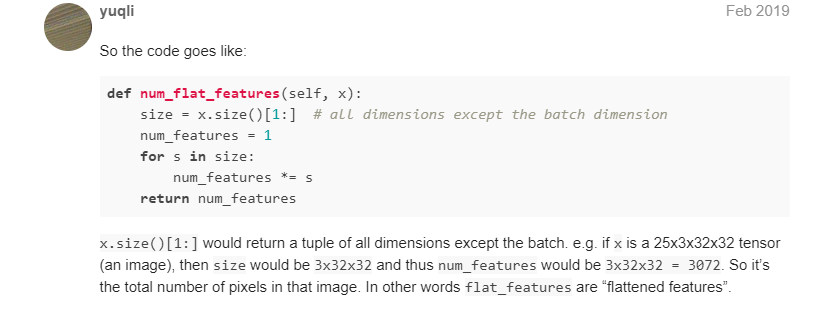

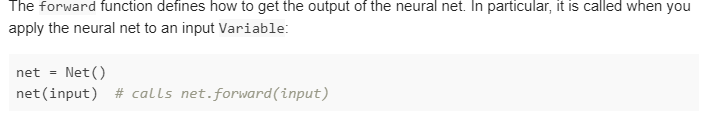

In [33]:
#Convolution layer
import torch.functional as F
class LestNet(nn.Module):
  def __init__(self):
    super(LestNet,self).__init__()
    self.conv1=nn.conv2d(1,6,5)
    self.conv2=nn.conv2d(6,16,3)
    self.fc1=nn.Linear(6*16*6,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)

  def forward(self,x):
    x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
    x=F.max_pool2d(F.relu(self.conv2(x)),2)
    x=x.view(-1,self.num_flat_features(x))
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    return self.fc3(x)

  def num_flat_features(self,x):
    size=x.size()[1:]
    num_features=1
    for s in size:
      num_features*=s
    return num_features

In [34]:
test_tensor=torch.rand(1,4,4)*20+5
print(test_tensor)
print(test_tensor.mean())

norm_layer=nn.BatchNorm1d(4)
norm_tensor=norm_layer(test_tensor)
print(norm_tensor)

tensor([[[ 7.0085, 10.3720,  8.1983,  6.3886],
         [20.9481, 12.6361, 16.0680, 17.4486],
         [19.5259, 22.1993, 15.6474, 21.4823],
         [13.5689, 14.1863, 14.7126, 24.2484]]])
tensor(15.2900)
tensor([[[-0.6468,  1.5656,  0.1358, -1.0546],
         [ 1.4008, -1.3894, -0.2374,  0.2260],
         [-0.0739,  0.9772, -1.5988,  0.6954],
         [-0.7086, -0.5680, -0.4480,  1.7247]]],
       grad_fn=<NativeBatchNormBackward0>)


In [35]:
#Dropout layers are a tool for encouraging sparse representations in your model - that is, pushing it to do inference with less data.
my_tensor = torch.rand(1, 4, 4)
print(my_tensor)
dropout = torch.nn.Dropout(p=0.4)
print(dropout(my_tensor))

tensor([[[0.6850, 0.9758, 0.8706, 0.8884],
         [0.7585, 0.4838, 0.4917, 0.6122],
         [0.3294, 0.9802, 0.4153, 0.3476],
         [0.8313, 0.1204, 0.8625, 0.6568]]])
tensor([[[1.1417, 1.6263, 1.4511, 0.0000],
         [0.0000, 0.8064, 0.8195, 1.0203],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [1.3855, 0.2007, 0.0000, 1.0946]]])


In [36]:
#Tensors
import torch
import numpy as np

In [37]:
data=[[1,2],[3,4]]
x_data=torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [38]:
np_array=np.array(data)
print(np_array)

x_np=torch.from_numpy(np_array)
print(x_np)

[[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]])


In [39]:
x_ones=torch.ones_like(x_np)
print(x_ones)

tensor([[1, 1],
        [1, 1]])


In [40]:
x_rand=torch.rand_like(x_ones,dtype=torch.float)
print(x_rand)

tensor([[0.5566, 0.2866],
        [0.1684, 0.8646]])


In [41]:
shape=(2,3)
rand_tensor=torch.randn(shape)
ones_tensor=torch.ones(shape)
zero_tensor=torch.zeros(shape)
print(rand_tensor)
print(ones_tensor)
print(zero_tensor)

tensor([[-0.6823, -0.8356, -1.4321],
        [-1.1531, -1.3384, -0.6961]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [42]:
tensor=torch.ones(4,4)
print(tensor)
print(tensor[0])

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([1., 1., 1., 1.])


In [43]:
agg=tensor.sum()
agg

tensor(16.)

In [44]:
agg.item()

16.0

In [45]:
#In-place operations Operations that store the result into the operand are called in-place. They are denoted by a _ suffix. For example: x.copy_(y), x.t_(), will change x.
tensor.add_(5)
tensor

tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]])

In [46]:
#Dataset loader
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [47]:
training_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15584015.94it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 303553.49it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5435592.95it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8047811.03it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [48]:
#Creating Custom Dataset
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self,annotations_file,img_dir,transform=None,target_transform=None):
    self.img_labels=pd.read_csv(annotations_file)
    self.img_dir=img_dir
    self.transform=transform
    self.target_transform=target_transform

  def __len__(self):
    return len(self.img_lables)

  def __getitem__(self,idx):
    img_path=os.path.join(self.img_dir,self.img_labels.iloc[idx,0])
    image=read_image(img_path)
    label=self.img_labels.iloc[idx,1]
    if self.transform:
      image=self.target_transform(label)
    return image,label


In [49]:
#Data laodaer
from torch.utils.data import DataLoader
train_dataloader=DataLoader(training_data,batch_size=64,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=64,shuffle=True)

In [50]:
#Iterate through dataloader
train_features,train_labels=next(iter(train_dataloader))
print(train_features.shape)
print(train_labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


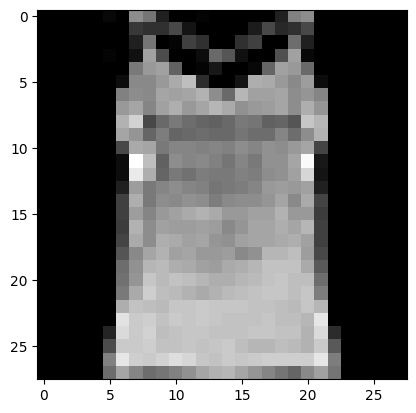

tensor(6)


In [51]:
img=train_features[0].squeeze()
label=train_labels[0]
plt.imshow(img,cmap="gray")
plt.show()
print(label)

In [52]:
#ToTensor converts a PIL image or NumPy ndarray into a FloatTensor. and scales the image’s pixel intensity values in the range [0., 1.]
x=torch.ones(5)
y=torch.zeros(3)
w=torch.randn(5,3,requires_grad=True)
b=torch.randn(3,requires_grad=True)

z=torch.matmul(x,w)+b
print(z)


tensor([2.0170, 0.1465, 3.2907], grad_fn=<AddBackward0>)


In [53]:
loss=torch.nn.functional.binary_cross_entropy_with_logits(z,y)

In [54]:
# A reference to the backward propagation function is stored in grad_fn property of a tensor
print(z.grad_fn)

In [55]:
# inp=torch.eye(4,5,requires_grad=True)
# out=(inp+1).pow(2).t() #Adding 1 , raising each element to power of 2 and transposing the matrix

# print(out)

# out.backward(torch.ones_like(out),retain_graph=True)
# print("First Call:", out)
# out.backward(torch.ones_like(out),retain_graph=True)
# print("Second Call: ",out)
inp = torch.eye(4, 5, requires_grad=True)
out = (inp+1).pow(2).t()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


In [56]:
!unzip data.zip

Archive:  data.zip
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  


In [57]:
from io import open
import glob
import os
def findFiles(path):
  return glob.glob(path)

In [58]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

Slusarski


In [59]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [67]:
def letterToIndex(letter):
  return all_letters.find(letter)

def letterToTensor(letter):
  letter_tensor=torch.zeros(1,n_letters)
  letter_tensor[0][letterToIndex(letter)]=1
  return letter_tensor

def lineToTensor(line):
  tensor=torch.zeros(len(line),1,n_letters)
  for li,letter in enumerate(line):
    tensor[li][0][letterToIndex(letter)]=1
  return tensor


print(letterToTensor('g'))
print(lineToTensor('Jones').size())


tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])
